In [18]:
# Load the data
reviews_df = pd.read_csv('../data/ethiopian_bank_reviews_20250604_2232.csv')

# First, let's see what columns we have
print("Available columns in the dataset:")
print("-" * 80)
print(reviews_df.columns.tolist())

print("\nDataset Overview:")
print("-" * 80)
print(f"Total number of reviews: {len(reviews_df)}")
print(f"Number of banks: {reviews_df['bank_name'].nunique()}")

print("\nFirst 10 reviews:")
print("-" * 80)
# Display only the columns that exist in the dataset
display(reviews_df.head(10))


Available columns in the dataset:
--------------------------------------------------------------------------------
['review_text', 'rating', 'review_date', 'bank_name', 'source', 'app_version', 'thumbs_up_count', 'language', 'country', 'package_name']

Dataset Overview:
--------------------------------------------------------------------------------
Total number of reviews: 1240
Number of banks: 3

First 10 reviews:
--------------------------------------------------------------------------------


,review_text,rating,review_date,bank_name,source,app_version,thumbs_up_count,language,country,package_name
0,The CBE app has been highly unreliable in rece...,2,2025-05-25,Commercial Bank of Ethiopia,Google Play,5.1.0,11,en,et,com.combanketh.mobilebanking
1,"this new update(Mar 19,2025) is great in fixin...",4,2025-03-20,Commercial Bank of Ethiopia,Google Play,5.1.0,823,en,et,com.combanketh.mobilebanking
2,Good job to the CBE team on this mobile app! I...,5,2025-04-04,Commercial Bank of Ethiopia,Google Play,5.1.0,529,en,et,com.combanketh.mobilebanking
3,this app has developed in a very good ways but...,5,2025-05-31,Commercial Bank of Ethiopia,Google Play,5.1.0,24,en,et,com.combanketh.mobilebanking
4,as if the update of march 19 i can't take a sc...,2,2025-03-19,Commercial Bank of Ethiopia,Google Play,5.1.0,58,en,et,com.combanketh.mobilebanking
5,Old version was very friendly to use. Now we c...,1,2025-03-21,Commercial Bank of Ethiopia,Google Play,5.1.0,39,en,et,com.combanketh.mobilebanking
6,Taking away the screenshot of the receipt is j...,1,2025-03-20,Commercial Bank of Ethiopia,Google Play,5.1.0,37,en,et,com.combanketh.mobilebanking
7,Recently there is big problem when sending to ...,2,2025-05-31,Commercial Bank of Ethiopia,Google Play,5.1.0,1,en,et,com.combanketh.mobilebanking
8,I was using this app for the last two years wi...,4,2025-05-27,Commercial Bank of Ethiopia,Google Play,5.1.0,2,en,et,com.combanketh.mobilebanking
9,It's very good in reminding the account number...,1,2025-02-15,Commercial Bank of Ethiopia,Google Play,5.0.9,936,en,et,com.combanketh.mobilebanking


In [ ]:
# Define custom color palettes
bank_colors = {
    'Commercial Bank of Ethiopia': '#1f77b4',  # Blue
    'Bank of Abyssinia': '#2ca02c',           # Green
    'Dashen Bank': '#ff7f0e'                  # Orange
}

sentiment_colors = {
    'POSITIVE': '#2ecc71',  # Green
    'NEUTRAL': '#95a5a6',   # Gray
    'NEGATIVE': '#e74c3c'   # Red
}

# 1. Rating Distribution by Bank
plt.figure(figsize=(15, 6))

# Create bar plot for average ratings
bank_means = reviews_df.groupby('bank_name')['rating'].mean()
bank_stds = reviews_df.groupby('bank_name')['rating'].std()

bars = plt.bar(range(len(bank_means)), bank_means, 
               color=[bank_colors[bank] for bank in bank_means.index],
               yerr=bank_stds,
               capsize=5)

# Add individual points with jitter
for i, bank in enumerate(bank_means.index):
    bank_data = reviews_df[reviews_df['bank_name'] == bank]
    x_jittered = np.random.normal(i, 0.04, size=len(bank_data))
    plt.scatter(x_jittered, 
               bank_data['rating'],
               color=bank_colors[bank],
               alpha=0.4,
               s=30)

plt.title('Rating Distribution by Bank', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Bank Name', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.xticks(range(len(bank_means)), bank_means.index, rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating labels
for i, (bank, mean) in enumerate(bank_means.items()):
    plt.text(i, mean + bank_stds[bank] + 0.2, f'Mean: {mean:.2f}', 
             horizontalalignment='center',
             color=bank_colors[bank],
             fontweight='bold',
             fontsize=10)

plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()

# 2. Rating Distribution by Sentiment
plt.figure(figsize=(15, 6))

# Calculate sentiment statistics
sentiment_means = reviews_df.groupby('sentiment')['rating'].mean()
sentiment_stds = reviews_df.groupby('sentiment')['rating'].std()

# Create bar plot
bars = plt.bar(range(len(sentiment_means)), sentiment_means,
               color=[sentiment_colors[s] for s in sentiment_means.index],
               yerr=sentiment_stds,
               capsize=5)

# Add individual points with jitter
for i, sentiment in enumerate(sentiment_means.index):
    sentiment_data = reviews_df[reviews_df['sentiment'] == sentiment]
    x_jittered = np.random.normal(i, 0.04, size=len(sentiment_data))
    plt.scatter(x_jittered,
               sentiment_data['rating'],
               color=sentiment_colors[sentiment],
               alpha=0.4,
               s=30)

plt.title('Rating Distribution by Sentiment', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Sentiment', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.xticks(range(len(sentiment_means)), sentiment_means.index)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating labels
for i, (sentiment, mean) in enumerate(sentiment_means.items()):
    plt.text(i, mean + sentiment_stds[sentiment] + 0.2, f'Mean: {mean:.2f}',
             horizontalalignment='center',
             color=sentiment_colors[sentiment],
             fontweight='bold',
             fontsize=10)

plt.ylim(0, 5.5)
plt.tight_layout()
plt.show()

# Display statistical summaries
print("\nRating Statistics by Bank:")
print("-" * 50)
bank_stats = reviews_df.groupby('bank_name')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std')
]).round(2)
display(bank_stats)

print("\nRating Statistics by Sentiment:")
print("-" * 50)
sentiment_stats = reviews_df.groupby('sentiment')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std')
]).round(2)
display(sentiment_stats)

# Add distribution information
print("\nRating Distribution by Bank:")
print("-" * 50)
for bank in reviews_df['bank_name'].unique():
    print(f"\n{bank}:")
    print(reviews_df[reviews_df['bank_name'] == bank]['rating'].value_counts().sort_index())


TypeError: Axes.bxp() got an unexpected keyword argument 'alpha'

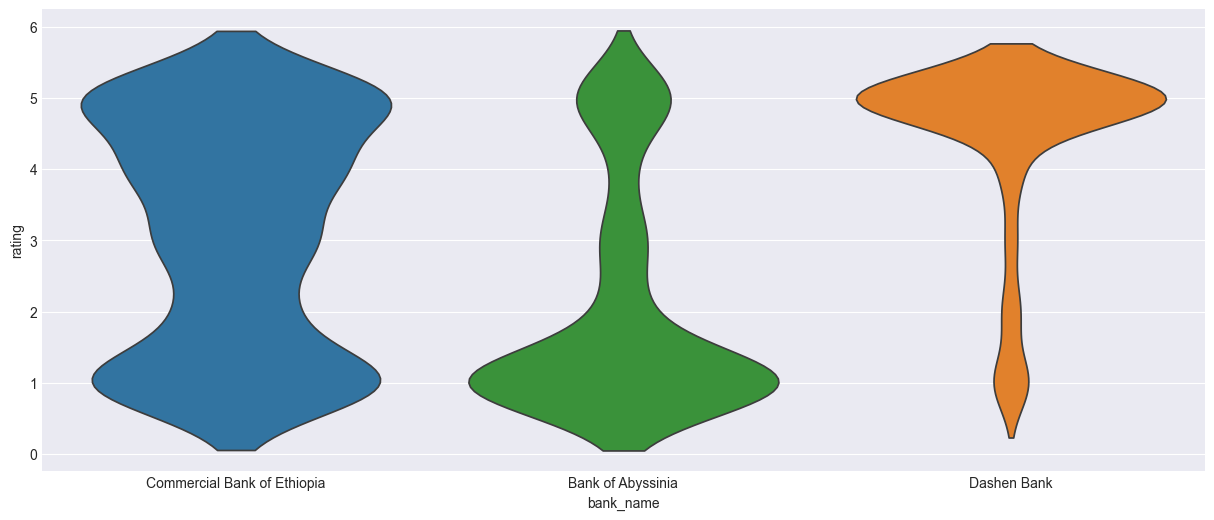

In [38]:
# Define custom color palettes
bank_colors = {
    'Commercial Bank of Ethiopia': '#1f77b4',  # Blue
    'Bank of Abyssinia': '#2ca02c',           # Green
    'Dashen Bank': '#ff7f0e'                  # Orange
}

sentiment_colors = {
    'POSITIVE': '#2ecc71',  # Green
    'NEUTRAL': '#95a5a6',   # Gray
    'NEGATIVE': '#e74c3c'   # Red
}

# 1. Rating Distribution by Bank
plt.figure(figsize=(15, 6))

# Create the violin plot first
sns.violinplot(data=reviews_df, x='bank_name', y='rating', 
               inner=None,  # Remove inner box plot to avoid overlap
               hue='bank_name',
               palette=bank_colors,
               legend=False)

# Add box plot on top
sns.boxplot(data=reviews_df, x='bank_name', y='rating',
            hue='bank_name',
            palette=bank_colors,
            width=0.2,
            showfliers=False,  # Hide outliers as we'll show actual points
            alpha=0.5,
            legend=False)

# Add individual points
for i, bank in enumerate(reviews_df['bank_name'].unique()):
    bank_data = reviews_df[reviews_df['bank_name'] == bank]
    # Add random jitter to x-coordinates
    x_jittered = np.random.normal(i, 0.04, size=len(bank_data))
    plt.scatter(x_jittered, 
               bank_data['rating'],
               color=bank_colors[bank],
               alpha=0.4,
               s=30)

plt.title('Rating Distribution by Bank', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Bank Name', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating labels
for i, bank in enumerate(reviews_df['bank_name'].unique()):
    mean_rating = reviews_df[reviews_df['bank_name'] == bank]['rating'].mean()
    plt.text(i, 5.2, f'Mean: {mean_rating:.2f}', 
             horizontalalignment='center',
             color=bank_colors[bank],
             fontweight='bold',
             fontsize=10)

plt.ylim(-0.5, 5.5)
plt.tight_layout()
plt.show()

# 2. Rating Distribution by Sentiment
plt.figure(figsize=(15, 6))

# Create violin plot without inner box plot
sns.violinplot(data=reviews_df, x='sentiment', y='rating',
               inner=None,
               hue='sentiment',
               palette=sentiment_colors,
               legend=False)

# Add box plot
sns.boxplot(data=reviews_df, x='sentiment', y='rating',
            hue='sentiment',
            palette=sentiment_colors,
            width=0.2,
            showfliers=False,
            alpha=0.5,
            legend=False)

# Add individual points
for i, sentiment in enumerate(['POSITIVE', 'NEUTRAL', 'NEGATIVE']):
    sentiment_data = reviews_df[reviews_df['sentiment'] == sentiment]
    # Add random jitter to x-coordinates
    x_jittered = np.random.normal(i, 0.04, size=len(sentiment_data))
    plt.scatter(x_jittered,
               sentiment_data['rating'],
               color=sentiment_colors[sentiment],
               alpha=0.4,
               s=30)

plt.title('Rating Distribution by Sentiment', pad=20, fontsize=12, fontweight='bold')
plt.xlabel('Sentiment', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating labels
for i, sentiment in enumerate(['POSITIVE', 'NEUTRAL', 'NEGATIVE']):
    sentiment_data = reviews_df[reviews_df['sentiment'] == sentiment]
    if not sentiment_data.empty:
        mean_rating = sentiment_data['rating'].mean()
        plt.text(i, 5.2, f'Mean: {mean_rating:.2f}',
                horizontalalignment='center',
                color=sentiment_colors[sentiment],
                fontweight='bold',
                fontsize=10)

plt.ylim(-0.5, 5.5)
plt.tight_layout()
plt.show()

# Display statistical summaries
print("\nRating Statistics by Bank:")
print("-" * 50)
bank_stats = reviews_df.groupby('bank_name')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std')
]).round(2)
display(bank_stats)

print("\nRating Statistics by Sentiment:")
print("-" * 50)
sentiment_stats = reviews_df.groupby('sentiment')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std')
]).round(2)
display(sentiment_stats)


C:\Users\tesfa\AppData\Local\Temp\ipykernel_25812\3251793924.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=reviews_df, x='bank_name', y='rating',


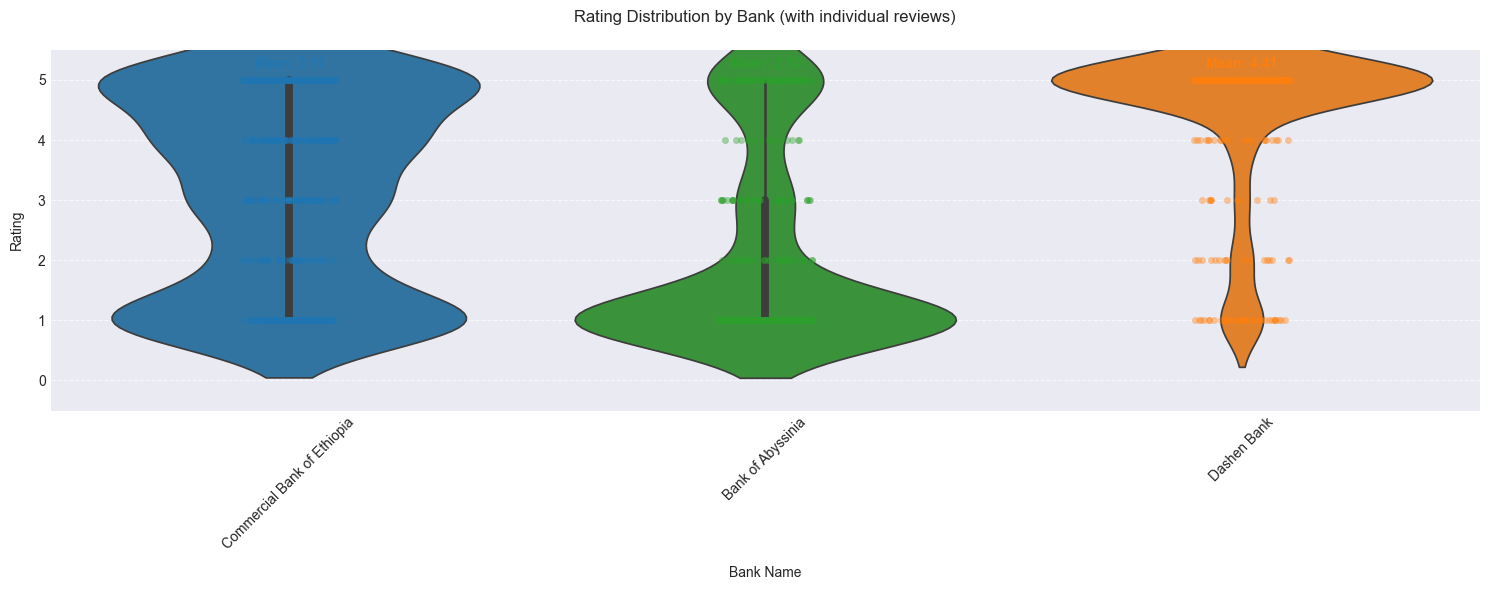

C:\Users\tesfa\AppData\Local\Temp\ipykernel_25812\3251793924.py:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=reviews_df, x='sentiment', y='rating',


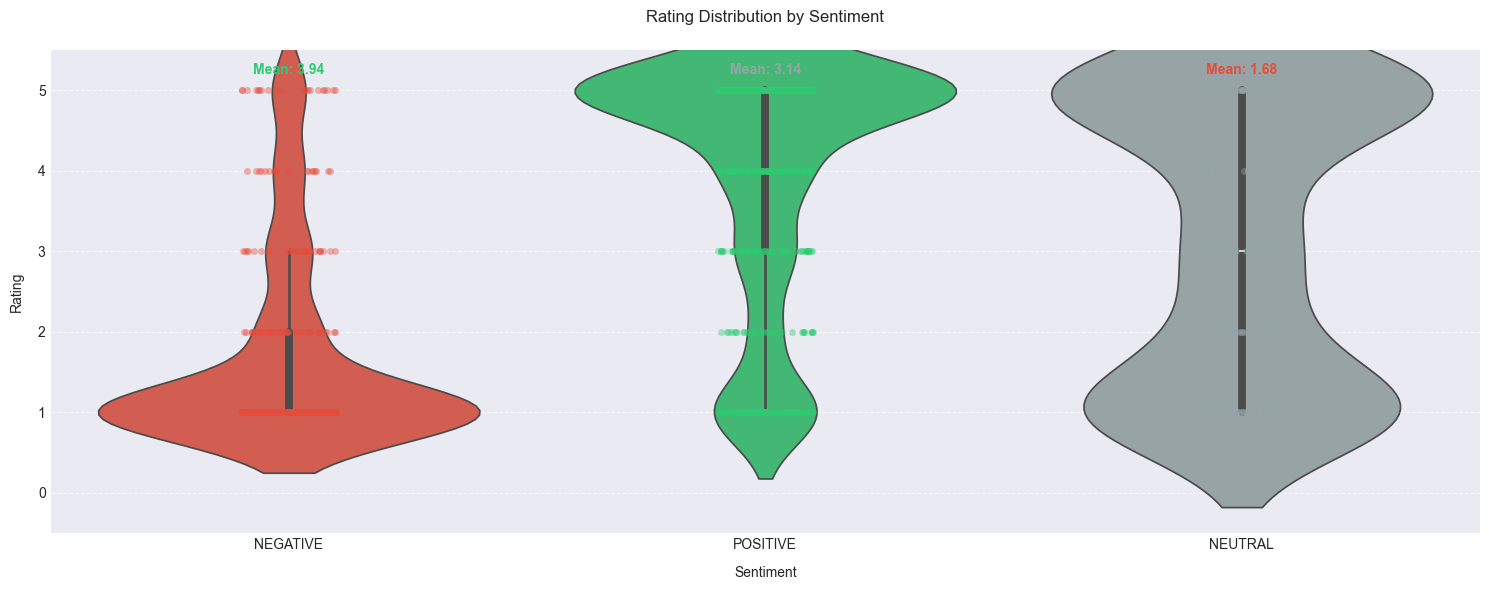


Rating Statistics by Sentiment:
--------------------------------------------------


,Count,Mean,Median,Std Dev
sentiment,,,,
NEGATIVE,333,1.68,1.0,1.20
NEUTRAL,246,3.14,3.0,1.77
POSITIVE,663,3.94,5.0,1.50


In [47]:
# Define a custom color palette for banks
bank_colors = {
    'Commercial Bank of Ethiopia': '#1f77b4',  # Blue
    'Bank of Abyssinia': '#2ca02c',           # Green
    'Dashen Bank': '#ff7f0e'                  # Orange
}

# Create an improved rating distribution plot
plt.figure(figsize=(15, 6))

# Create violin plot with individual points and custom colors
sns.violinplot(data=reviews_df, x='bank_name', y='rating', 
               inner='box', palette=bank_colors.values())

# Add individual points with matching colors
for i, bank in enumerate(reviews_df['bank_name'].unique()):
    bank_data = reviews_df[reviews_df['bank_name'] == bank]
    sns.stripplot(data=bank_data, x='bank_name', y='rating',
                 color=bank_colors[bank], alpha=0.4, size=5, jitter=True)

plt.title('Rating Distribution by Bank (with individual reviews)', pad=20, fontsize=12)
plt.xlabel('Bank Name', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating as text on the plot
for i, bank in enumerate(reviews_df['bank_name'].unique()):
    mean_rating = reviews_df[reviews_df['bank_name'] == bank]['rating'].mean()
    plt.text(i, 5.2, f'Mean: {mean_rating:.2f}', 
             horizontalalignment='center', color=bank_colors[bank],
             fontweight='bold', fontsize=10)

plt.ylim(-0.5, 5.5)  # Set y-axis limits to show all ratings clearly
plt.tight_layout()
plt.show()

# Create detailed rating distribution by sentiment
plt.figure(figsize=(15, 6))

# Define sentiment colors
sentiment_colors = {
    'POSITIVE': '#2ecc71',  # Green
    'NEUTRAL': '#95a5a6',   # Gray
    'NEGATIVE': '#e74c3c'   # Red
}

# Create violin plots for each sentiment
sns.violinplot(data=reviews_df, x='sentiment', y='rating', 
               inner='box', palette=sentiment_colors)

# Add individual points with matching colors
for sentiment in ['POSITIVE', 'NEUTRAL', 'NEGATIVE']:
    sentiment_data = reviews_df[reviews_df['sentiment'] == sentiment]
    sns.stripplot(data=sentiment_data, x='sentiment', y='rating',
                 color=sentiment_colors[sentiment], alpha=0.4, size=5, jitter=True)

plt.title('Rating Distribution by Sentiment', pad=20, fontsize=12)
plt.xlabel('Sentiment', labelpad=10, fontsize=10)
plt.ylabel('Rating', labelpad=10, fontsize=10)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating as text on the plot
for i, sentiment in enumerate(['POSITIVE', 'NEUTRAL', 'NEGATIVE']):
    sentiment_data = reviews_df[reviews_df['sentiment'] == sentiment]
    if not sentiment_data.empty:
        mean_rating = sentiment_data['rating'].mean()
        plt.text(i, 5.2, f'Mean: {mean_rating:.2f}', 
                horizontalalignment='center', color=sentiment_colors[sentiment],
                fontweight='bold', fontsize=10)

plt.ylim(-0.5, 5.5)
plt.tight_layout()
plt.show()

# Display statistical summary
print("\nRating Statistics by Sentiment:")
print("-" * 50)
sentiment_stats = reviews_df.groupby('sentiment')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std')
]).round(2)

display(sentiment_stats)


Number of reviews per bank:
--------------------------------------------------
bank_name
Commercial Bank of Ethiopia    451
Bank of Abyssinia              410
Dashen Bank                    381
Name: count, dtype: int64

Rating distribution for each bank:
--------------------------------------------------

Commercial Bank of Ethiopia:
rating
1    129
2     41
3     64
4     84
5    133
Name: count, dtype: int64

Bank of Abyssinia:
rating
1    255
2     29
3     35
4     14
5     77
Name: count, dtype: int64

Dashen Bank:
rating
1     33
2     17
3     11
4     21
5    299
Name: count, dtype: int64


C:\Users\tesfa\AppData\Local\Temp\ipykernel_25812\802974976.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=reviews_df, x='bank_name', y='rating',


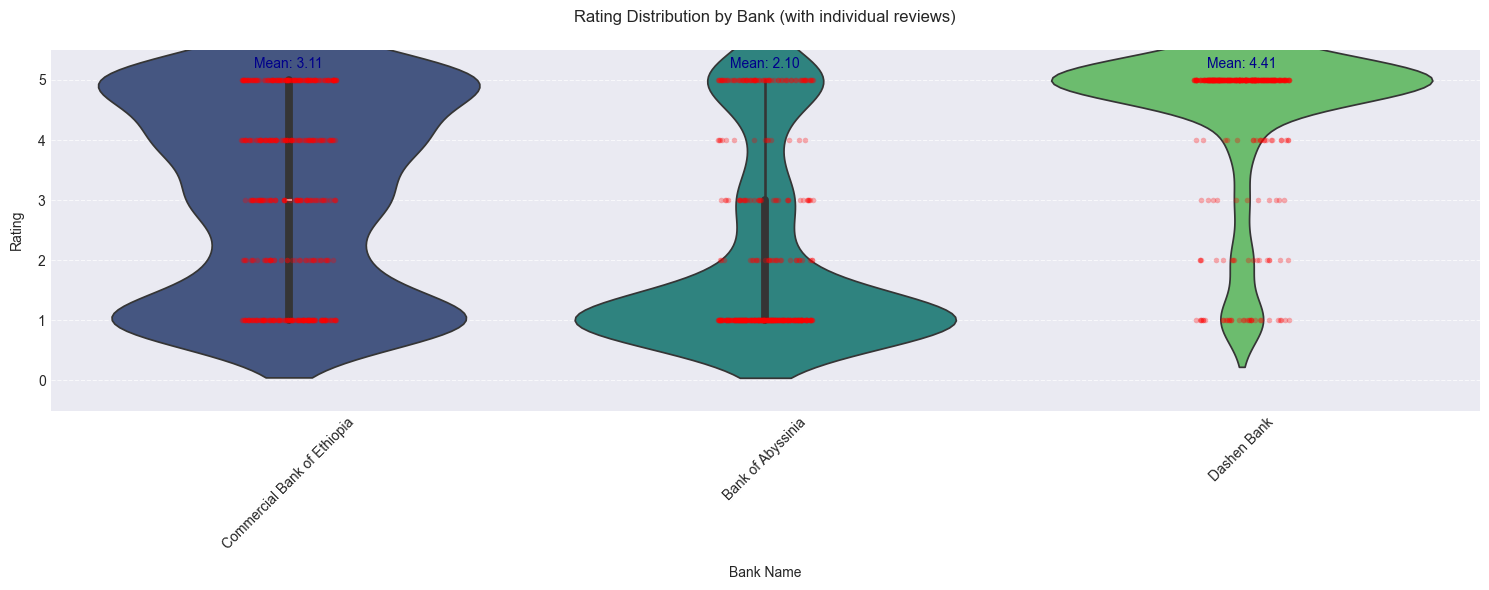


Detailed Rating Statistics by Bank:
--------------------------------------------------


,Count,Mean,Median,Std Dev,Min,Max
bank_name,,,,,,
Bank of Abyssinia,410,2.10,1.0,1.59,1,5
Commercial Bank of Ethiopia,451,3.11,3.0,1.61,1,5
Dashen Bank,381,4.41,5.0,1.27,1,5


In [48]:
# First, let's check the data for each bank
print("Number of reviews per bank:")
print("-" * 50)
print(reviews_df['bank_name'].value_counts())

print("\nRating distribution for each bank:")
print("-" * 50)
for bank in reviews_df['bank_name'].unique():
    print(f"\n{bank}:")
    print(reviews_df[reviews_df['bank_name'] == bank]['rating'].value_counts().sort_index())

# Create an improved rating distribution plot
plt.figure(figsize=(15, 6))

# Create violin plot with individual points
sns.violinplot(data=reviews_df, x='bank_name', y='rating', 
               inner='box', palette='viridis')
sns.stripplot(data=reviews_df, x='bank_name', y='rating', 
              color='red', alpha=0.3, size=4, jitter=True)

plt.title('Rating Distribution by Bank (with individual reviews)', pad=20)
plt.xlabel('Bank Name', labelpad=10)
plt.ylabel('Rating', labelpad=10)
plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)

# Add mean rating as text on the plot
for i, bank in enumerate(reviews_df['bank_name'].unique()):
    mean_rating = reviews_df[reviews_df['bank_name'] == bank]['rating'].mean()
    plt.text(i, 5.2, f'Mean: {mean_rating:.2f}', 
             horizontalalignment='center', color='darkblue')

plt.ylim(-0.5, 5.5)  # Set y-axis limits to show all ratings clearly
plt.tight_layout()
plt.show()

# Create a detailed statistical summary
print("\nDetailed Rating Statistics by Bank:")
print("-" * 50)
stats_df = reviews_df.groupby('bank_name')['rating'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)

display(stats_df)


In [49]:
# Set up visualization style
plt.style.use('seaborn-v0_8-darkgrid')
colors = {
    'positive': '#2ecc71',
    'negative': '#e74c3c',
    'neutral': '#95a5a6',
    'primary': '#3498db',
    'secondary': '#f1c40f'
}

# Find and load the most recent data files
data_dir = "data"
review_files = [f for f in os.listdir(data_dir) if f.startswith("sentiment_analysis_results_")]
analysis_files = [f for f in os.listdir(data_dir) if f.startswith("bank_analysis_summary_")]

if not review_files or not analysis_files:
    raise FileNotFoundError("Analysis result files not found in data directory!")

latest_review_file = max(review_files)
latest_analysis_file = max(analysis_files)

# Load the data
reviews_df = pd.read_csv(os.path.join(data_dir, latest_review_file))
with open(os.path.join(data_dir, latest_analysis_file), 'r') as f:
    bank_analysis = json.load(f)

print("Data loaded successfully!")
print(f"Review data shape: {reviews_df.shape}")
print(f"Number of banks analyzed: {len(bank_analysis)}")


Data loaded successfully!
Review data shape: (1242, 19)
Number of banks analyzed: 3


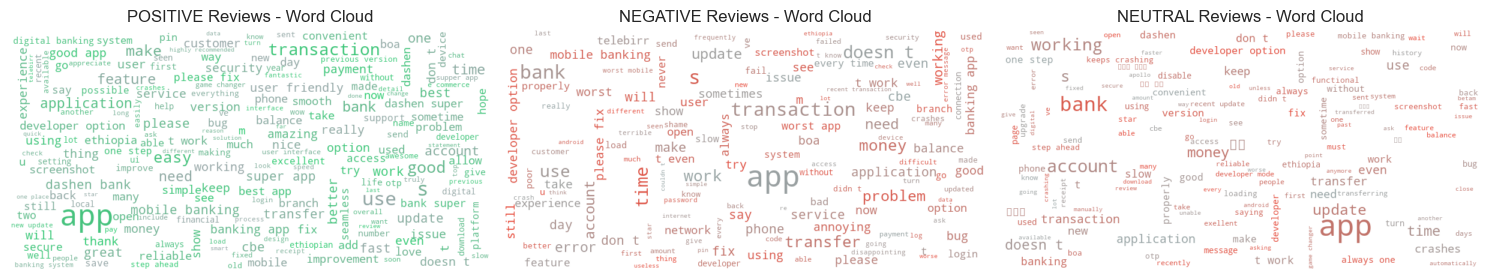


Keyword Statistics by Sentiment:
--------------------------------------------------------------------------------

POSITIVE Reviews - Top 10 Most Common Words:
the     747
it      658
to      576
app     531
and     492
i       437
is      436
a       266
this    255
of      185
Name: count, dtype: int64

NEGATIVE Reviews - Top 10 Most Common Words:
the     511
it      484
to      380
app     303
i       291
is      265
and     236
t       187
this    179
a       147
Name: count, dtype: int64

NEUTRAL Reviews - Top 10 Most Common Words:
the     130
it      120
to       97
app      86
i        75
is       69
and      65
not      53
t        50
this     46
Name: count, dtype: int64


In [50]:
# First, let's determine sentiment based on the available columns
# We'll use vader_compound score if available, otherwise we'll use the rating
import re


if 'vader_compound' in reviews_df.columns:
    reviews_df['sentiment'] = reviews_df['vader_compound'].apply(
        lambda x: 'POSITIVE' if x > 0.05 else 'NEGATIVE' if x < -0.05 else 'NEUTRAL'
    )
else:
    reviews_df['sentiment'] = reviews_df['rating'].apply(
        lambda x: 'POSITIVE' if x >= 4 else 'NEGATIVE' if x <= 2 else 'NEUTRAL'
    )

# Create word clouds for different sentiments
plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE', 'NEUTRAL']):
    plt.subplot(1, 3, i+1)
    
    # Get reviews for this sentiment
    sentiment_mask = reviews_df['sentiment'] == sentiment
    sentiment_texts = reviews_df[sentiment_mask]['review_text']  # Using review_text instead of processed_text
    
    # Convert all texts to strings and filter out invalid entries
    valid_texts = []
    for text in sentiment_texts:
        if isinstance(text, (float, int)):
            continue
        text_str = str(text).strip()
        if text_str:
            # Basic text cleaning
            text_str = re.sub(r'[^\w\s]', ' ', text_str.lower())
            valid_texts.append(text_str)
    
    if valid_texts:
        # Join all valid texts
        combined_text = ' '.join(valid_texts)
        
        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            min_font_size=10,
            max_font_size=50,
            colormap=LinearSegmentedColormap.from_list('custom', 
                ['#95a5a6', colors['positive' if sentiment == 'POSITIVE' else 'negative']])
        ).generate(combined_text)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{sentiment} Reviews - Word Cloud')
    else:
        plt.text(0.5, 0.5, f'No valid {sentiment.lower()} reviews available',
                ha='center', va='center')
        plt.axis('off')
        plt.title(f'{sentiment} Reviews - No Data')

plt.tight_layout()
plt.show()

# Display keyword statistics
print("\nKeyword Statistics by Sentiment:")
print("-" * 80)
for sentiment in ['POSITIVE', 'NEGATIVE', 'NEUTRAL']:
    sentiment_mask = reviews_df['sentiment'] == sentiment
    sentiment_texts = reviews_df[sentiment_mask]['review_text']
    
    # Clean and process texts
    valid_texts = []
    for text in sentiment_texts:
        if isinstance(text, str) and text.strip():
            # Clean text
            cleaned_text = re.sub(r'[^\w\s]', ' ', text.lower())
            valid_texts.append(cleaned_text)
    
    if valid_texts:
        # Get word frequencies
        words = ' '.join(valid_texts).split()
        word_freq = pd.Series(words).value_counts()
        
        print(f"\n{sentiment} Reviews - Top 10 Most Common Words:")
        print(word_freq.head(10))


Review Statistics by Bank:
--------------------------------------------------


,Total Reviews,Avg Rating,Rating Std,Positive Ratio
bank_name,,,,
Bank of Abyssinia,410,2.10,1.59,0.13
Commercial Bank of Ethiopia,451,3.11,1.61,0.25
Dashen Bank,381,4.41,1.27,0.64


C:\Users\tesfa\AppData\Local\Temp\ipykernel_25812\2197308412.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reviews_df, x='bank_name', y='rating', palette='viridis')


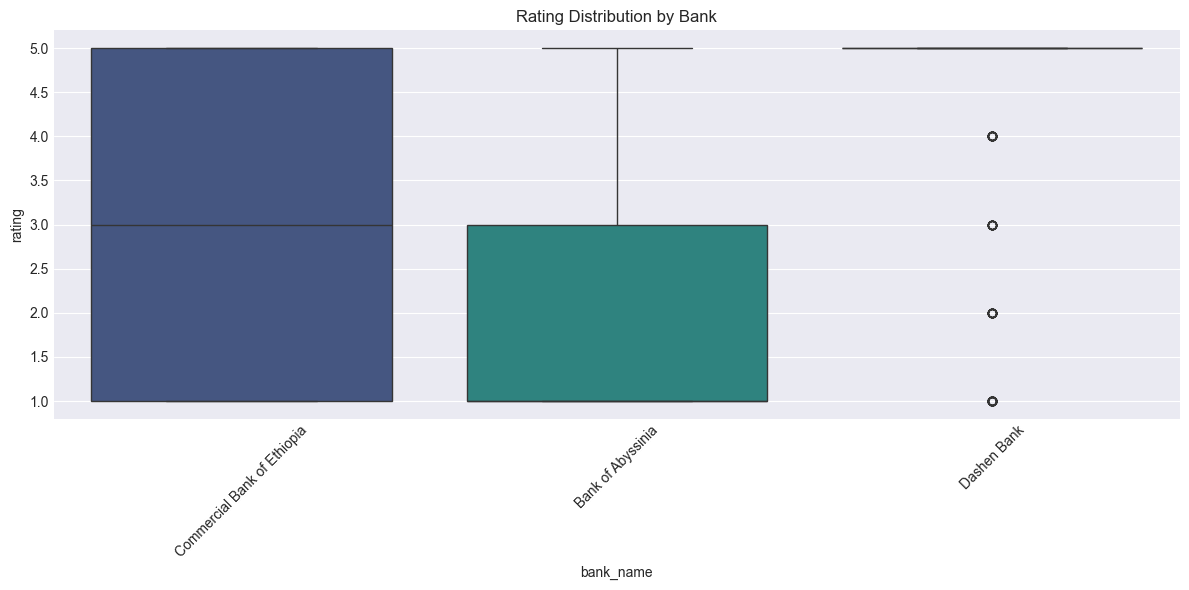

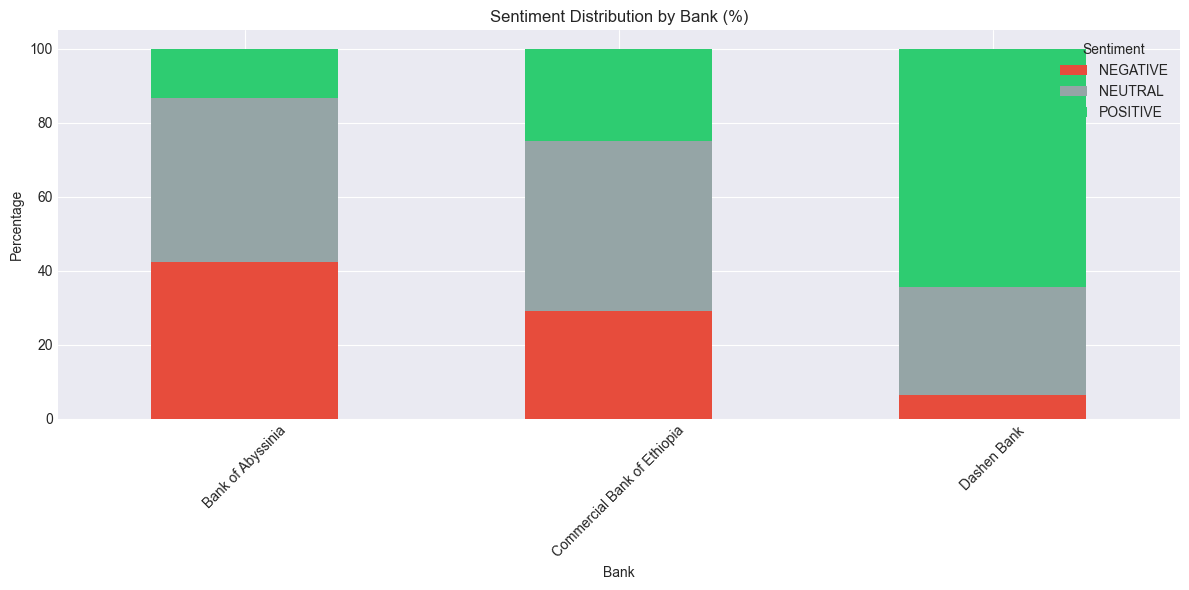

In [51]:
# Display basic statistics
print("Review Statistics by Bank:")
print("-" * 50)
bank_stats = reviews_df.groupby('bank_name').agg({
    'rating': ['count', 'mean', 'std'],
    'consensus_sentiment': lambda x: (x == 'POSITIVE').mean()
}).round(2)

bank_stats.columns = ['Total Reviews', 'Avg Rating', 'Rating Std', 'Positive Ratio']
display(bank_stats)

# Create rating distribution plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=reviews_df, x='bank_name', y='rating', palette='viridis')
plt.title('Rating Distribution by Bank')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Show sentiment distribution
sentiment_dist = pd.crosstab(reviews_df['bank_name'], reviews_df['consensus_sentiment'])
sentiment_dist_pct = sentiment_dist.div(sentiment_dist.sum(axis=1), axis=0) * 100

# Create stacked bar plot
ax = sentiment_dist_pct.plot(kind='bar', stacked=True, figsize=(12, 6),
                           color=[colors['negative'], colors['neutral'], colors['positive']])
plt.title('Sentiment Distribution by Bank (%)')
plt.xlabel('Bank')
plt.ylabel('Percentage')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


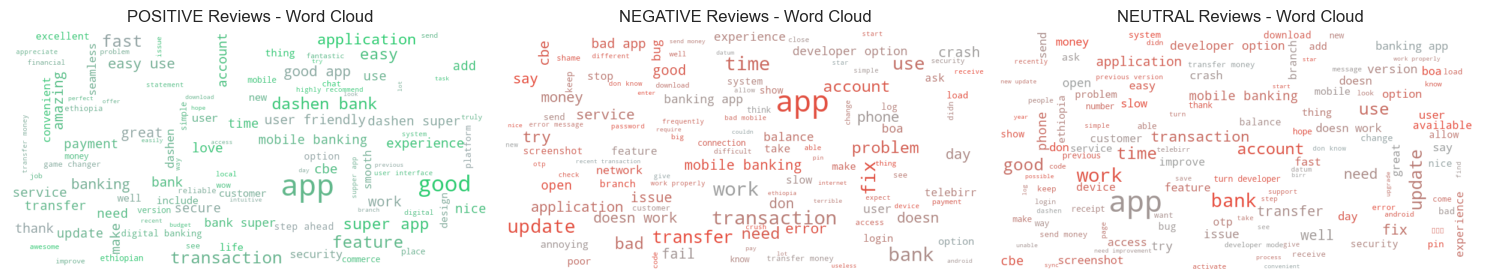


Keyword Statistics by Sentiment:
--------------------------------------------------------------------------------

POSITIVE Reviews - Top 10 Most Common Words:
app        309
good       139
bank        97
dashen      86
easy        82
banking     76
super       70
use         68
fast        60
user        55
Name: count, dtype: int64

NEGATIVE Reviews - Top 10 Most Common Words:
app            316
work           112
transaction     88
bad             79
bank            78
update          77
time            75
transfer        65
fix             62
doesn           59
Name: count, dtype: int64

NEUTRAL Reviews - Top 10 Most Common Words:
app            338
work           121
bank            94
update          92
time            76
good            72
use             71
transaction     71
account         66
need            62
Name: count, dtype: int64


In [52]:
# Create word clouds for different sentiments
plt.figure(figsize=(15, 5))

for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE', 'NEUTRAL']):
    plt.subplot(1, 3, i+1)
    
    # Get reviews for this sentiment
    sentiment_mask = reviews_df['consensus_sentiment'] == sentiment
    sentiment_texts = reviews_df[sentiment_mask]['processed_text']
    
    # Convert all texts to strings and filter out invalid entries
    valid_texts = []
    for text in sentiment_texts:
        if isinstance(text, (float, int)):
            continue
        text_str = str(text).strip()
        if text_str:
            valid_texts.append(text_str)
    
    if valid_texts:
        # Join all valid texts
        combined_text = ' '.join(valid_texts)
        
        # Generate word cloud
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color='white',
            min_font_size=10,
            max_font_size=50,
            colormap=LinearSegmentedColormap.from_list('custom', 
                ['#95a5a6', colors['positive' if sentiment == 'POSITIVE' else 'negative']])
        ).generate(combined_text)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{sentiment} Reviews - Word Cloud')
    else:
        plt.text(0.5, 0.5, f'No valid {sentiment.lower()} reviews available',
                ha='center', va='center')
        plt.axis('off')
        plt.title(f'{sentiment} Reviews - No Data')

plt.tight_layout()
plt.show()

# Display keyword statistics
print("\nKeyword Statistics by Sentiment:")
print("-" * 80)
for sentiment in ['POSITIVE', 'NEGATIVE', 'NEUTRAL']:
    sentiment_mask = reviews_df['consensus_sentiment'] == sentiment
    sentiment_texts = reviews_df[sentiment_mask]['processed_text']
    valid_texts = [str(text) for text in sentiment_texts if isinstance(text, str) and str(text).strip()]
    
    if valid_texts:
        # Get word frequencies
        words = ' '.join(valid_texts).split()
        word_freq = pd.Series(words).value_counts()
        
        print(f"\n{sentiment} Reviews - Top 10 Most Common Words:")
        print(word_freq.head(10))


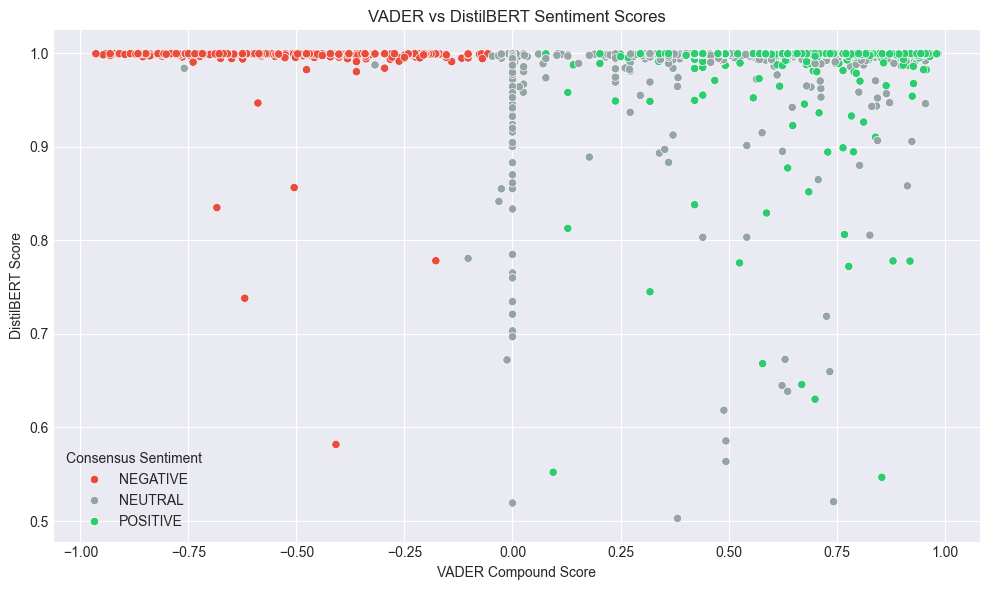

In [55]:
# Convert review_date to datetime
reviews_df['review_date'] = pd.to_datetime(reviews_df['review_date'])

# Create scatter plot of VADER vs DistilBERT scores
plt.figure(figsize=(10, 6))
sns.scatterplot(data=reviews_df, x='vader_compound', y='distilbert_score',
                hue='consensus_sentiment', palette=[colors['negative'], colors['neutral'], colors['positive']])
plt.title('VADER vs DistilBERT Sentiment Scores')
plt.xlabel('VADER Compound Score')
plt.ylabel('DistilBERT Score')
plt.legend(title='Consensus Sentiment')
plt.tight_layout()
plt.show()

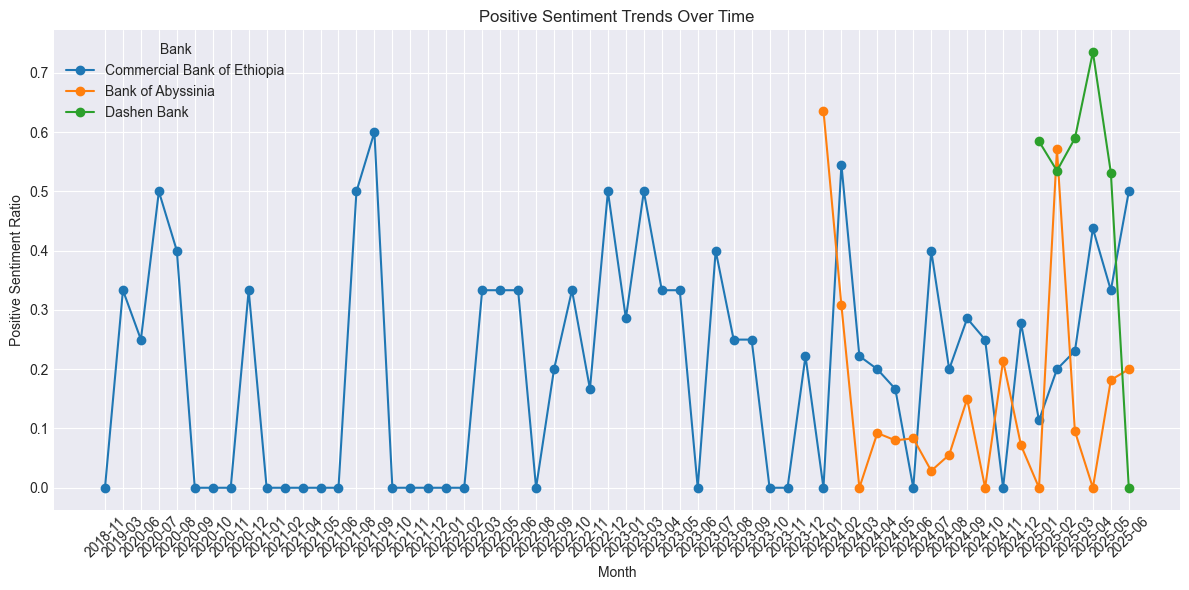

In [54]:


# Create sentiment trends over time
reviews_df['month'] = reviews_df['review_date'].dt.to_period('M')
sentiment_trends = reviews_df.groupby(['month', 'bank_name']).agg({
    'consensus_sentiment': lambda x: (x == 'POSITIVE').mean()
}).reset_index()
# Plot sentiment trends
plt.figure(figsize=(12, 6))
for bank in reviews_df['bank_name'].unique():
    bank_data = sentiment_trends[sentiment_trends['bank_name'] == bank]
    plt.plot(bank_data['month'].astype(str), bank_data['consensus_sentiment'], 
             marker='o', label=bank)

plt.title('Positive Sentiment Trends Over Time')
plt.xlabel('Month')
plt.ylabel('Positive Sentiment Ratio')
plt.xticks(rotation=45)
plt.legend(title='Bank')
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\tesfa\AppData\Local\Temp\ipykernel_25812\2819300046.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=reviews_df, x='consensus_sentiment', y='rating',


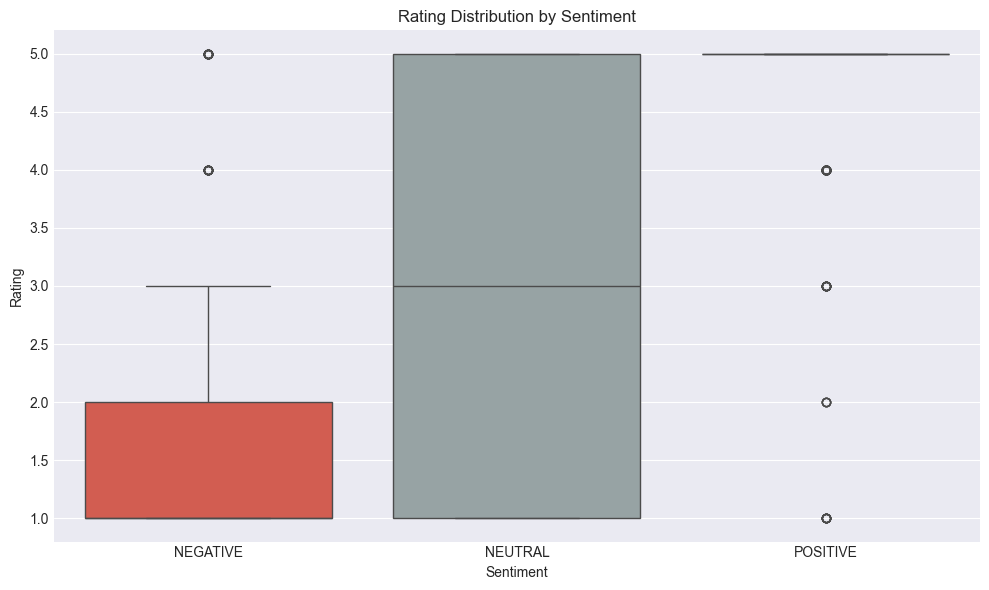

In [35]:


# Create boxplot of ratings by sentiment
plt.figure(figsize=(10, 6))
sns.boxplot(data=reviews_df, x='consensus_sentiment', y='rating',
            palette=[colors['negative'], colors['neutral'], colors['positive']])
plt.title('Rating Distribution by Sentiment')
plt.xlabel('Sentiment')
plt.ylabel('Rating')
plt.tight_layout()
plt.show()


In [56]:
# Clean and preprocess the text data
def clean_text(text):
    if pd.isna(text) or not isinstance(text, str):
        return ""
    # Remove special characters and extra whitespace
    text = re.sub(r'[^\w\s]', ' ', str(text))
    text = ' '.join(text.split())
    return text.lower()

# Apply cleaning to processed_text column
reviews_df['processed_text'] = reviews_df['processed_text'].apply(clean_text)

# Remove empty texts
reviews_df = reviews_df[reviews_df['processed_text'].str.len() > 0]

print("Text preprocessing completed.")
print(f"Number of reviews with valid text: {len(reviews_df)}")
print("\nSample of processed texts:")
print(reviews_df['processed_text'].head())


Text preprocessing completed.
Number of reviews with valid text: 1229

Sample of processed texts:
0    cbe app highly unreliable recent week frequent...
1    new update mar 2025 great fix bug stability sm...
2    good job cbe team mobile app design way simple...
3    app develop good way comment need prevent scre...
4    update march screenshot app save file annoying...
Name: processed_text, dtype: object


<Figure size 1200x600 with 0 Axes>

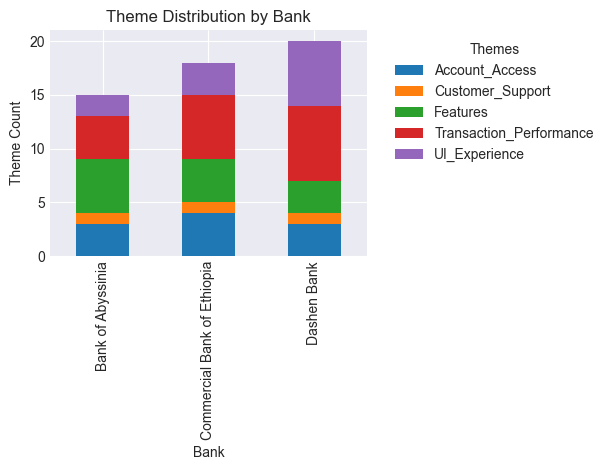

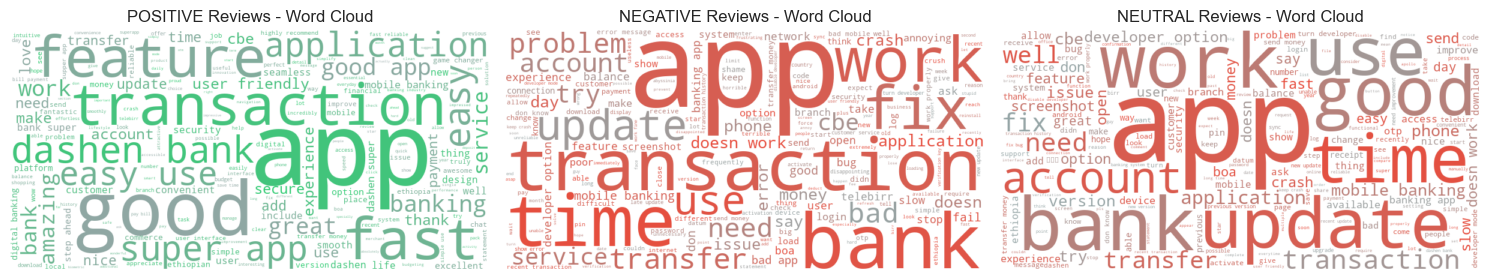


Commercial Bank of Ethiopia - Top Keywords by Theme:
--------------------------------------------------
UI_Experience: user, experience, screenshot
Features: feature, developer option, option, service
Transaction_Performance: transfer money, transaction history, payment, transaction, transfer
Account_Access: security, account, verification, access
Customer_Support: service

Bank of Abyssinia - Top Keywords by Theme:
--------------------------------------------------
UI_Experience: user, experience
Features: feature, developer option, functional, option, service
Transaction_Performance: slow, transaction, transfer, fast
Account_Access: account, login, access
Customer_Support: service

Dashen Bank - Top Keywords by Theme:
--------------------------------------------------
UI_Experience: user, interface, experience, user friendly, intuitive
Features: feature, option, service
Transaction_Performance: slow, speed, payment, transaction, transfer
Account_Access: security, account, design
Cus

In [57]:
# Create theme distribution visualization
theme_data = []
for bank_name, analysis in bank_analysis.items():
    for theme, count in analysis['themes'].items():
        theme_data.append({
            'Bank': bank_name,
            'Theme': theme,
            'Count': count
        })

theme_df = pd.DataFrame(theme_data)
theme_pivot = theme_df.pivot(index='Bank', columns='Theme', values='Count')

# Plot theme distribution
plt.figure(figsize=(12, 6))
theme_pivot.plot(kind='bar', stacked=True)
plt.title('Theme Distribution by Bank')
plt.xlabel('Bank')
plt.ylabel('Theme Count')
plt.legend(title='Themes', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Create word clouds for different sentiments
plt.figure(figsize=(15, 5))
for i, sentiment in enumerate(['POSITIVE', 'NEGATIVE', 'NEUTRAL']):
    plt.subplot(1, 3, i+1)
    text = ' '.join(reviews_df[reviews_df['consensus_sentiment'] == sentiment]['processed_text'])
    
    if text.strip():
        wordcloud = WordCloud(
            width=800, height=400,
            background_color='white',
            colormap=LinearSegmentedColormap.from_list('custom', 
                ['#95a5a6', colors['positive' if sentiment == 'POSITIVE' else 'negative']])
        ).generate(text)
        
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'{sentiment} Reviews - Word Cloud')

plt.tight_layout()
plt.show()

# Display top keywords by theme for each bank
for bank_name, analysis in bank_analysis.items():
    print(f"\n{bank_name} - Top Keywords by Theme:")
    print("-" * 50)
    for theme, keywords in analysis['top_keywords_by_theme'].items():
        print(f"{theme}: {', '.join(keywords[:5])}")



Commercial Bank of Ethiopia Analysis
Total Reviews: 451
Average Rating: 3.11

Sentiment Distribution:
Positive: 24.83%
Negative: 29.05%
Neutral: 46.12%

Sentiment by Rating:

1 Stars (129 reviews):
Positive: 0.78%
Neutral:  43.41%
Negative: 55.81%

2 Stars (41 reviews):
Positive: 9.76%
Neutral:  51.22%
Negative: 39.02%

3 Stars (64 reviews):
Positive: 10.94%
Neutral:  60.94%
Negative: 28.12%

4 Stars (84 reviews):
Positive: 39.29%
Neutral:  44.05%
Negative: 16.67%

5 Stars (133 reviews):
Positive: 50.38%
Neutral:  41.35%
Negative: 8.27%


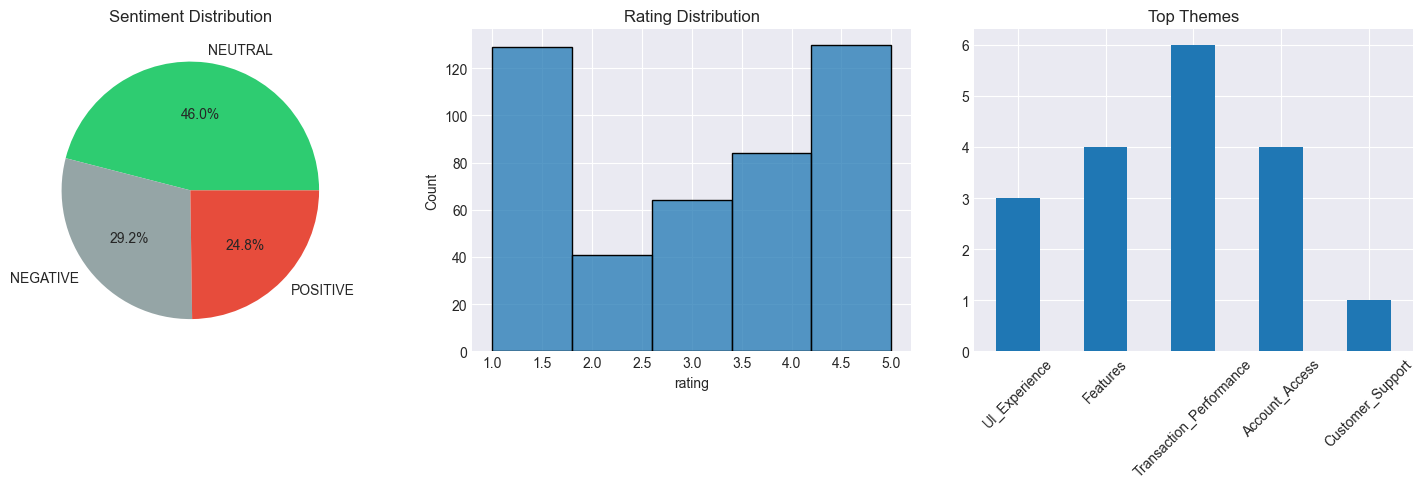



Bank of Abyssinia Analysis
Total Reviews: 410
Average Rating: 2.10

Sentiment Distribution:
Positive: 13.17%
Negative: 42.44%
Neutral: 44.39%

Sentiment by Rating:

1 Stars (255 reviews):
Positive: 2.35%
Neutral:  41.96%
Negative: 55.69%

2 Stars (29 reviews):
Positive: 0.00%
Neutral:  48.28%
Negative: 51.72%

3 Stars (35 reviews):
Positive: 2.86%
Neutral:  71.43%
Negative: 25.71%

4 Stars (14 reviews):
Positive: 28.57%
Neutral:  57.14%
Negative: 14.29%

5 Stars (77 reviews):
Positive: 55.84%
Neutral:  36.36%
Negative: 7.79%


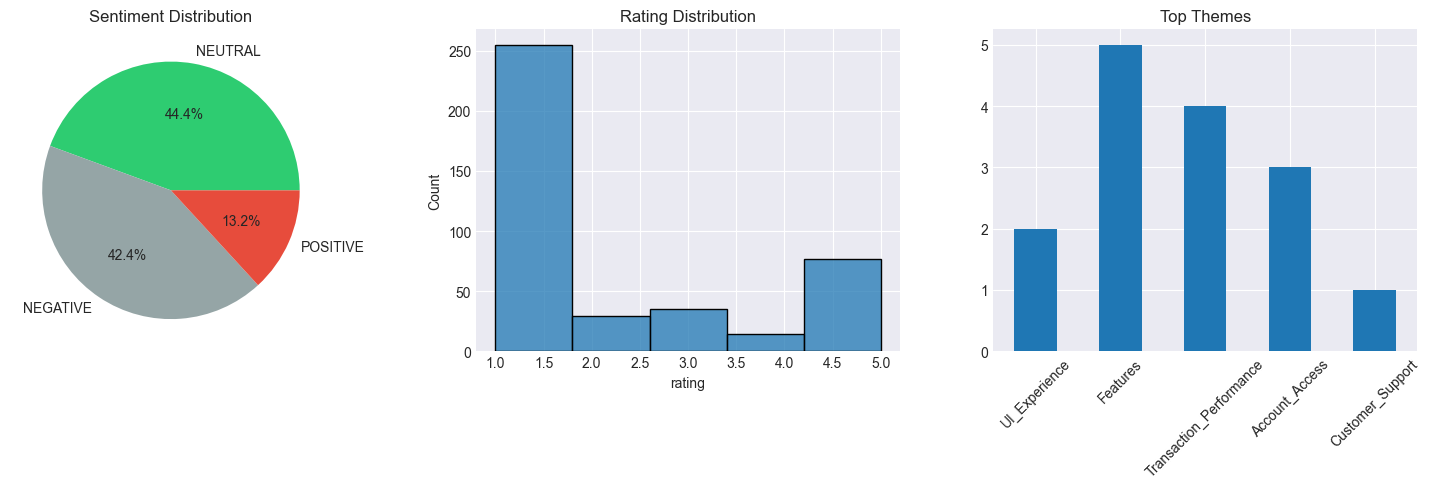



Dashen Bank Analysis
Total Reviews: 381
Average Rating: 4.41

Sentiment Distribution:
Positive: 64.30%
Negative: 6.56%
Neutral: 29.13%

Sentiment by Rating:

1 Stars (33 reviews):
Positive: 6.06%
Neutral:  51.52%
Negative: 42.42%

2 Stars (17 reviews):
Positive: 0.00%
Neutral:  64.71%
Negative: 35.29%

3 Stars (11 reviews):
Positive: 36.36%
Neutral:  63.64%
Negative: 0.00%

4 Stars (21 reviews):
Positive: 42.86%
Neutral:  47.62%
Negative: 9.52%

5 Stars (299 reviews):
Positive: 76.92%
Neutral:  22.07%
Negative: 1.00%


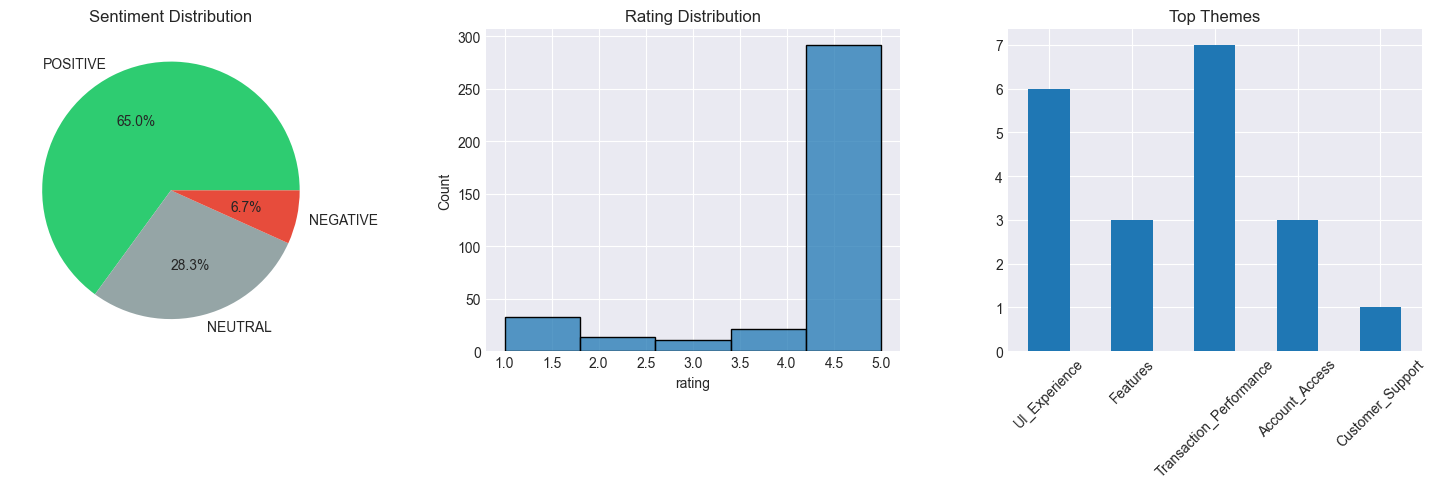

In [58]:
# Create detailed analysis for each bank
for bank_name, analysis in bank_analysis.items():
    print(f"\n{bank_name} Analysis")
    print("=" * 80)
    
    # Basic metrics
    print(f"Total Reviews: {analysis['review_count']}")
    print(f"Average Rating: {analysis['average_rating']:.2f}")
    
    # Sentiment distribution
    print("\nSentiment Distribution:")
    for sentiment, ratio in analysis['sentiment_distribution'].items():
        print(f"{sentiment.capitalize()}: {ratio:.2%}")
    
    # Rating-wise sentiment analysis
    print("\nSentiment by Rating:")
    for rating, stats in analysis['sentiment_by_rating'].items():
        print(f"\n{rating} Stars ({stats['count']} reviews):")
        print(f"Positive: {stats['positive_ratio']:.2%}")
        print(f"Neutral:  {stats['neutral_ratio']:.2%}")
        print(f"Negative: {stats['negative_ratio']:.2%}")
    
    # Create visualizations for this bank
    bank_data = reviews_df[reviews_df['bank_name'] == bank_name]
    
    # Sentiment distribution pie chart
    plt.figure(figsize=(15, 5))
    
    # Plot 1: Sentiment Distribution
    plt.subplot(1, 3, 1)
    sentiment_counts = bank_data['consensus_sentiment'].value_counts()
    plt.pie(sentiment_counts, labels=sentiment_counts.index, 
            colors=[colors['positive'], colors['neutral'], colors['negative']],
            autopct='%1.1f%%')
    plt.title('Sentiment Distribution')
    
    # Plot 2: Rating Distribution
    plt.subplot(1, 3, 2)
    sns.histplot(data=bank_data, x='rating', bins=5)
    plt.title('Rating Distribution')
    
    # Plot 3: Top Themes
    plt.subplot(1, 3, 3)
    theme_counts = pd.Series(analysis['themes'])
    theme_counts.plot(kind='bar')
    plt.title('Top Themes')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()
    
    print("\n" + "=" * 80)
